## DAY1 宿題
- Kickstarter Projectsの分類

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

# 4_linear_regression_multi_real_data
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 6_logistic_regression_real_data
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

In [2]:
# https://qiita.com/Sasagawa0185/items/1185933dd0e560a26b07
import datetime

# 与えられた文字列型の時刻をdatetime型へ変換する関数
def str2datetime(t, format):
    return datetime.datetime.strptime(t, format)

def deltaDay(t):
    t1, t2 = t
    delta = t2 - t1
    return delta.total_seconds()/(60*60*24) #差を秒に直したものを一日当たりの秒数でわったものを出力します。

### 1. データの読み込み

In [3]:
# df_house = pd.read_csv("../1_data/kc_house_data.csv")[['yr_renovated', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15']]
# df_house['yr_renovated'] = df_house['yr_renovated'] > 0 

df_house = pd.read_csv("kickstarter-projects/ks-projects-201801.csv", index_col=0)
continuousCols = ["launched", "deadline", "goal"]
quantizedCols = ["category", "main_category", "currency", "country"]
uniqueCols = ["name"]
unavailableCols = ["pledged", "backers", "usd pledged", "usd_pledged_real", "usd_goal_real"]

df_house.launched
df_house.launched = df_house.launched.apply(str2datetime, format='%Y-%m-%d %H:%M:%S')
df_house.deadline = df_house.deadline.apply(str2datetime, format='%Y-%m-%d')
df_house["deltaDay"] = df_house[["launched", "deadline"]].apply(deltaDay, axis=1)

states = ["successful", "failed", "canceled"]
df_house["stateValue"] = (states[0] == df_house["state"]).astype(float)

In [4]:
def normalize(df):
    return (df - df.min())/(df.max()-df.min())
requiredCols = ["goal", "deltaDay", "stateValue"]
df_required = df_house[requiredCols].apply(normalize)

### 2. データ統計量の確認

In [5]:
df_required.describe()

,goal,deltaDay,stateValue
count,378661.000000,378661.000000,378661.000000
mean,0.000491,0.002026,0.353762
std,0.011834,0.003938,0.478137
min,0.000000,0.000000,0.000000
25%,0.000020,0.001738,0.000000
50%,0.000052,0.001773,0.000000
75%,0.000160,0.002189,1.000000
max,1.000000,1.000000,1.000000


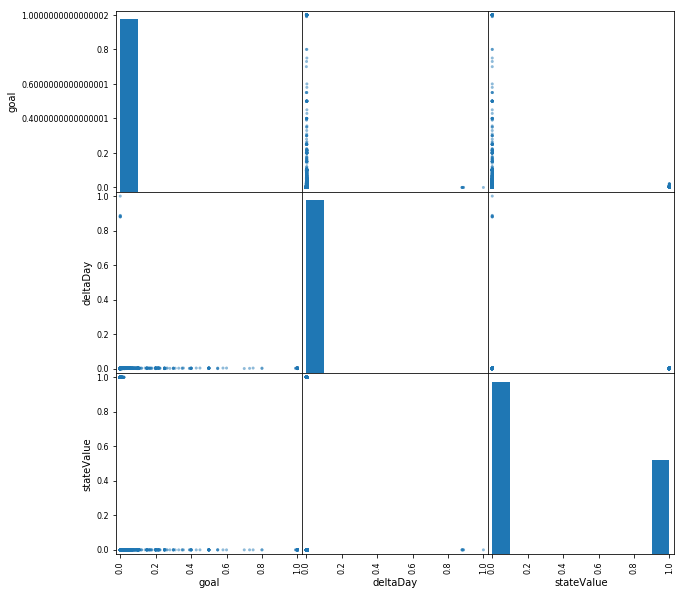

In [6]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df_required, figsize=(10,10))
plt.show()

In [7]:
# 相関係数を確認
df_required.corr()

,goal,deltaDay,stateValue
goal,1.000000,0.004314,-0.024332
deltaDay,0.004314,1.000000,-0.026134
stateValue,-0.024332,-0.026134,1.000000
